## 📦 Import Libraries

We start by importing essential libraries for data handling and visualization:
- `pandas` for tabular data
- `seaborn` and `matplotlib` for plotting

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")


## 📥 Load & Merge Data

We load the following processed outputs:
- `retailer_feature_matrix.csv`: contains all engineered features
- `retailer_clusters.csv`: cluster assignments
- `retailer_scores.csv`: final Channel Quality Index score

These are merged on `retailer_id` to build the full analysis frame.


In [9]:
import pandas as pd

# Paths
merged_path = "../data/merged/retailer_feature_matrix.csv"
scores_path = "../data/processed/retailer_scores.csv"

# Load the merged feature matrix
df = pd.read_csv(merged_path)

# Check if 'channel_quality_score' is already present
if 'channel_quality_score' not in df.columns:
    # Load scores separately
    df_scores = pd.read_csv(scores_path)
    # Merge scores into main DataFrame
    df = df.merge(df_scores, on='retailer_id', how='left')

# Quick overview
print("✅ Final DataFrame shape:", df.shape)
df.head()




,retailer_id,sim_change_count,same_msisdn_ratio,fraud_score,total_volume,avg_ticket_size,active_days,avg_txn_volume,active_days_ratio,performance_score,risk_prediction_score,sentiment_score,complaint_intensity,feedback_score,cluster_id,cluster_label,channel_quality_score
0,R001,12,0.0,0,28434.66,265.744486,20,1421.7330,1.0,790.789846,0.142857,0.084444,0.130841,0.398330,0,Star,76.070243
1,R002,11,0.0,0,25523.26,252.705545,20,1276.1630,1.0,714.093163,0.428571,0.221429,0.099010,0.493253,0,Star,47.976158
2,R003,9,0.0,1,24775.71,258.080312,20,1238.7855,1.0,697.016844,0.285714,-0.003636,0.093750,0.360318,2,Dormant,41.313118
3,R004,12,0.0,0,22229.62,233.996000,20,1111.4810,1.0,626.139300,0.285714,0.121429,0.105263,0.430752,1,Risky,15.880353
4,R005,14,0.0,1,26486.72,257.152621,20,1324.3360,1.0,739.513786,0.142857,0.216667,0.058252,0.506699,0,Star,56.932302


## 🔢 Cluster Label Distribution

This bar chart shows how retailers are distributed across the behavior-based clusters (e.g., Star, Risky, Dormant). It helps identify which behavioral segments dominate.


/var/folders/8y/3qjztzs97911rrlc6z42czw80000gn/T/ipykernel_76801/3936661563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cluster_label', order=df['cluster_label'].value_counts().index, palette="Set2")


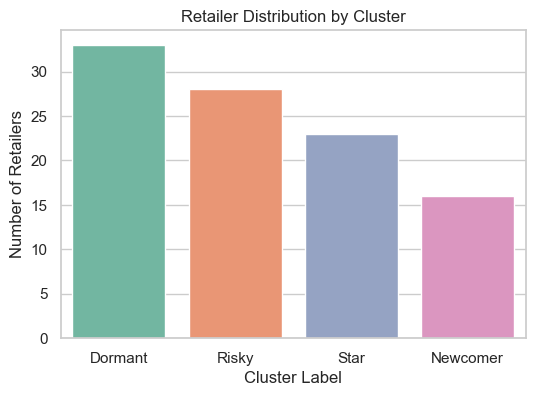

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cluster_label', order=df['cluster_label'].value_counts().index, palette="Set2")
plt.title("Retailer Distribution by Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Retailers")
plt.show()


## 📈 Channel Quality Index (CQI) Score Distribution

This histogram shows how retailer CQI scores are distributed. It helps understand score skewness, concentration, and the quality spread across the base.


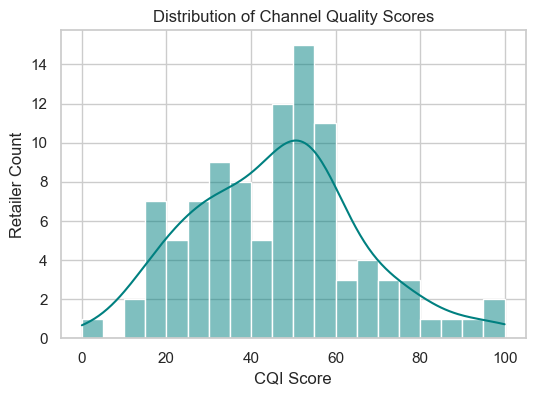

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['channel_quality_score'], bins=20, kde=True, color="teal")
plt.title("Distribution of Channel Quality Scores")
plt.xlabel("CQI Score")
plt.ylabel("Retailer Count")
plt.show()


## 🔍 Fraud Score vs Performance Score

This scatter plot helps visualize the relationship between a retailer's anomaly/fraud score and their transactional performance. It's useful for spotting risky but high-performing entities.


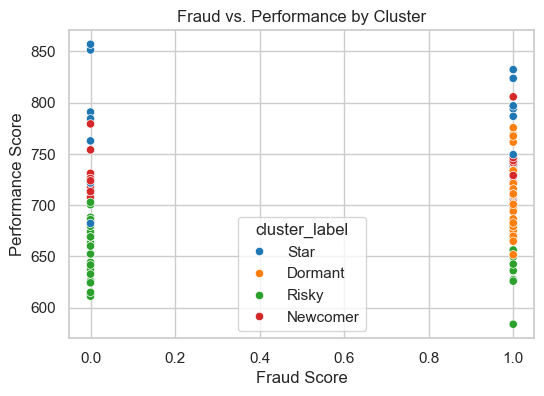

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='fraud_score', y='performance_score', hue='cluster_label', palette="tab10")
plt.title("Fraud vs. Performance by Cluster")
plt.xlabel("Fraud Score")
plt.ylabel("Performance Score")
plt.show()


## 💬 Sentiment Score vs Complaint Intensity

This chart compares sentiment extracted from customer feedback against complaint frequency. It gives insight into how customers perceive retailers and whether feedback aligns with actual complaints.


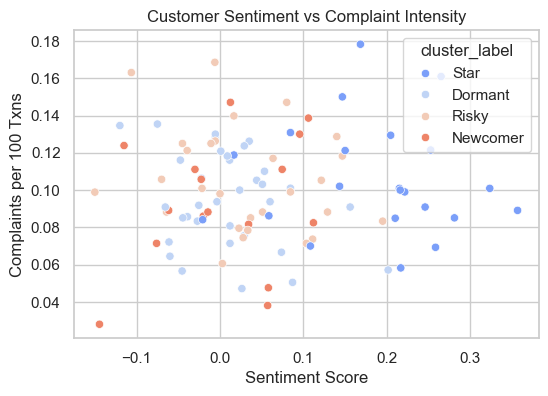

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sentiment_score', y='complaint_intensity', hue='cluster_label', palette="coolwarm")
plt.title("Customer Sentiment vs Complaint Intensity")
plt.xlabel("Sentiment Score")
plt.ylabel("Complaints per 100 Txns")
plt.show()


## 📊 Feature Correlation Matrix

This heatmap shows how various features correlate with one another — including fraud score, performance, sentiment, complaints, and the final CQI score. Useful for feature relationship diagnostics.


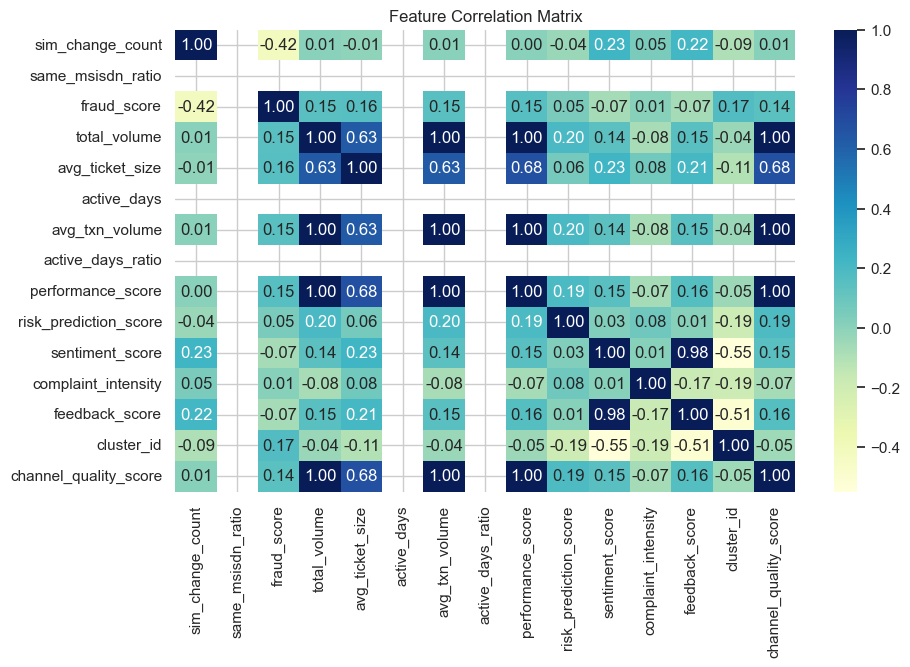

In [14]:
plt.figure(figsize=(10, 6))

# Select only numeric columns (ignores cluster_label and other strings)
numeric_df = df.select_dtypes(include='number').copy()

# Drop rows with any missing values just in case
numeric_df = numeric_df.dropna()

# Correlation matrix
corr = numeric_df.corr()

# Plot
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

